In [66]:
import pandas as pd

import re
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix



In [67]:
# Contoh: load dataset
df = pd.read_csv("dataset.csv")

# Lihat struktur dataset
print(df.head())
print(df.info())
print(df['label'].value_counts())

                                              review  label
0  Q kira besar ,ternyata mini🤭🤭 tapi cocok sic d...      1
1  Koyok ngengek, yg dikirim minyak 1 mili iklan ...      0
2  Saya kira awalnya minyak wangi Fress beneran, ...      1
3  Baik, harum sekali, testyr kurang besar, murah...      2
4  Produk sesuai dengan pesanan pengiriman tepat ...      2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1118 non-null   object
 1   label   1118 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 17.6+ KB
None
label
0    557
1    291
2    270
Name: count, dtype: int64


In [68]:
# Load stopwords Indonesia
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

# Stemmer Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # hapus URL
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # hapus angka/simbol
    tokens = text.split()  # tokenisasi
    tokens = [stemmer.stem(w) for w in tokens if w not in stop_words]  # stopwords + stemming
    return " ".join(tokens)

df['clean_review'] = df['review'].astype(str).apply(clean_text)
print(df[['review','clean_review']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\javier\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review  \
0  Q kira besar ,ternyata mini🤭🤭 tapi cocok sic d...   
1  Koyok ngengek, yg dikirim minyak 1 mili iklan ...   
2  Saya kira awalnya minyak wangi Fress beneran, ...   
3  Baik, harum sekali, testyr kurang besar, murah...   
4  Produk sesuai dengan pesanan pengiriman tepat ...   

                                        clean_review  
0  q mini cocok sic dg hrgany emang cm rb aj sic ...  
1  koyok ngengek yg kirim minyak mil iklan nya ml...  
2  minyak wangi fress beneran serah jasa kirim ba...  
3          harum testyr murah relatif kualitas bagus  
4   produk sesuai pesan kirim kemas bagus mantab gan  


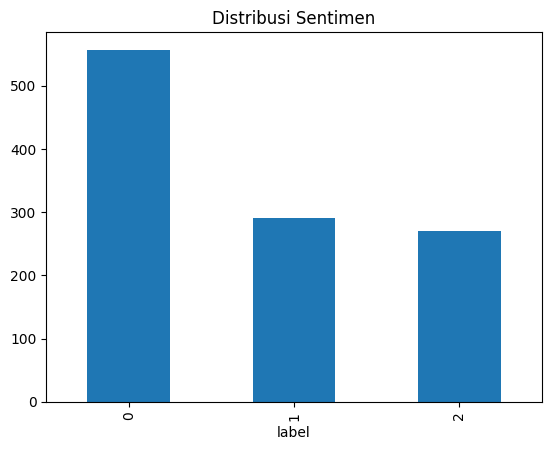

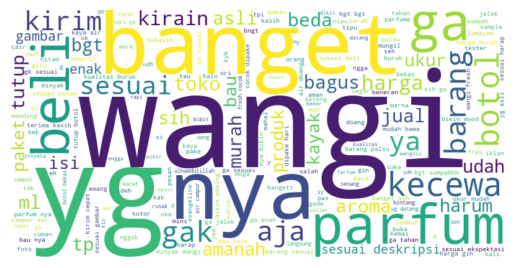

In [69]:
# Distribusi label
df['label'].value_counts().plot(kind='bar')
plt.title("Distribusi Sentimen")
plt.show()

# WordCloud

text = " ".join(df['clean_review'])
wc = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [70]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_review'])
y = df['label']


In [71]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
    

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [72]:
# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.80      0.93      0.86       128
           1       0.66      0.53      0.59        43
           2       0.88      0.68      0.77        53

    accuracy                           0.79       224
   macro avg       0.78      0.71      0.74       224
weighted avg       0.79      0.79      0.79       224

[[119   6   3]
 [ 18  23   2]
 [ 11   6  36]]


In [93]:
# Kalimat baru
sample_text = "Wangi banget sampe mual, ga enak sama sekali, parfum apaan ini"

# Preprocessing (sama persis dengan data training)
sample_clean = clean_text(sample_text)

# Vectorize
sample_vector = vectorizer.transform([sample_clean])

pred = model.predict(sample_vector)[0]

# print("Teks:", sample_text)
# print("Setelah preprocessing:", sample_clean)
# print("Prediksi kelas:", pred)
if(pred==0):
    print('Komentar Negatif')
elif(pred==1):
    print('Komentar Netral')
elif(pred==2):
    print('Komentar Positif')

Komentar Negatif
